In [1]:
import os
import os.path as osp
import configparser
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Initialize data paths

In [2]:
# Get dataset path
config_path = osp.join(os.getcwd(), 'config.ini')
parser = configparser.ConfigParser()
parser.read(config_path)

# Initialize folder paths
affectiveROAD_folder_path = parser['DATA_PATH']['affectiveROAD_dataset_path']
wesad_folder_path = parser['DATA_PATH']['wesad_dataset_path']
dcu_nvt_folder_path = parser['DATA_PATH']['dcu_nvt_dataset_path']

# Initialize file paths
affectiveROAD_ground_truth_path = osp.join(affectiveROAD_folder_path, 'AffectiveROAD_ground_truth.npy')
wesad_ground_truth_path = osp.join(wesad_folder_path, 'WESAD_CHEST_ground_truth.npy') # We just need WESAD_CHEST dataset ground-truth as it is the same as WESAD_WRIST
dcu_nvt_ground_truth_path = osp.join(dcu_nvt_folder_path, 'DCU_NVT_EXP1_ground_truth.npy')

# Load ground-truth of all datasets

In [3]:
affectiveROAD_ground_truth = np.load(affectiveROAD_ground_truth_path)
wesad_ground_truth = np.load(wesad_ground_truth_path)
dcu_nvt_ground_truth = np.load(dcu_nvt_ground_truth_path)

# Analyze the balance of the datasets

In [4]:
def get_binary_label_count(binary_ground_truth: np.array):
    binary_label_cnt = Counter(binary_ground_truth)
    return binary_label_cnt

In [5]:
affectiveROAD_binary_label_cnt = get_binary_label_count(affectiveROAD_ground_truth)
wesad_binary_label_cnt = get_binary_label_count(wesad_ground_truth)
dcu_nvt_binary_label_cnt = get_binary_label_count(dcu_nvt_ground_truth)

Counter({1: 1227, 0: 1136})
Counter({0: 1588, 1: 460})
Counter({0: 1131, 1: 377})


In [6]:
# Initialize constant parameters
STRESS = 1
NON_STRESS = 0
NUM_DATASETS = 3

In [8]:
affectiveROAD_binary_label_cnt = [affectiveROAD_binary_label_cnt[NON_STRESS], affectiveROAD_binary_label_cnt[STRESS]]
wesad_binary_label_cnt = [wesad_binary_label_cnt[NON_STRESS], wesad_binary_label_cnt[STRESS]]
dcu_nvt_binary_label_cnt = [dcu_nvt_binary_label_cnt[NON_STRESS], dcu_nvt_binary_label_cnt[STRESS]]

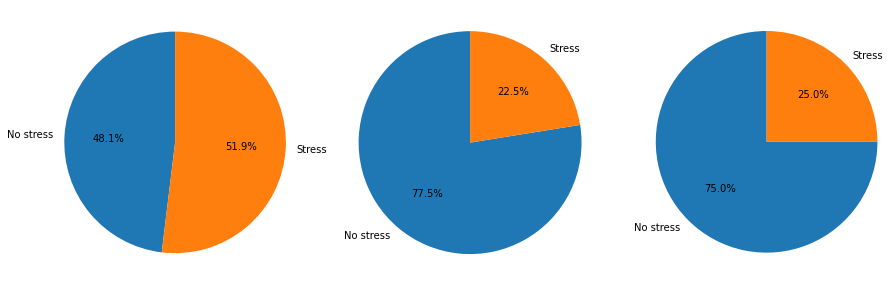

In [10]:
labels = 'No stress', 'Stress'
fig, (ax1, ax2, ax3) = plt.subplots(1, NUM_DATASETS, figsize=(15, 5))
ax1.pie(affectiveROAD_binary_label_cnt, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.pie(wesad_binary_label_cnt, labels=labels, autopct='%1.1f%%', startangle=90)
ax3.pie(dcu_nvt_binary_label_cnt, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
plt.show()